In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt



In [2]:
data=pd.read_csv("scholarship.csv")

In [3]:
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


C:\Users\Admin\AppData\Local\Temp\ipykernel_9628\2816616503.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["semester_percentage"])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='semester_percentage', ylabel='Density'>

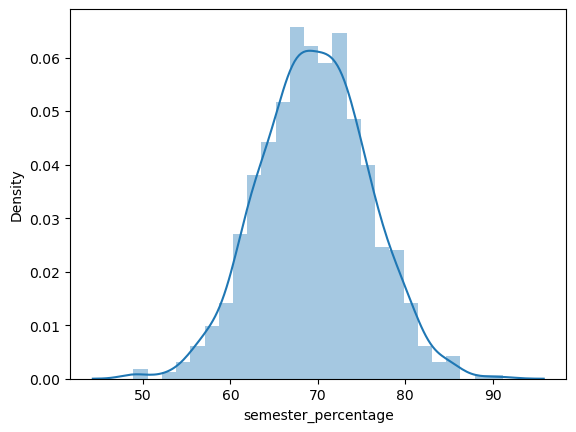

In [5]:
sns.distplot(data["semester_percentage"])

<Axes: >

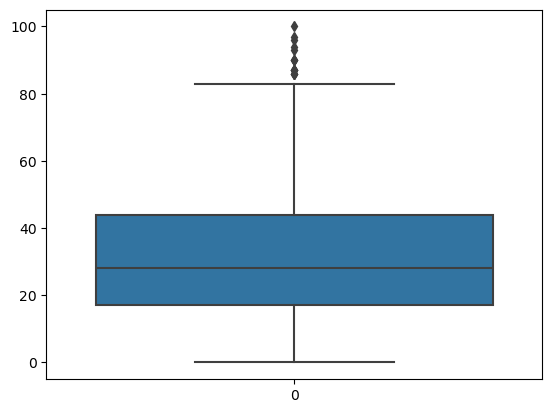

In [7]:
sns.boxplot(data["scholarship_exam_marks"])

In [13]:
q1=data["scholarship_exam_marks"].quantile(0.25)
q3=data["scholarship_exam_marks"].quantile(0.75)


In [14]:
q1

17.0

In [15]:
q3

44.0

In [16]:
IQR=q1-q3

In [17]:
IQR

-27.0

In [19]:
min=q1- 1.5*IQR
max=q3- 1.5*IQR

In [20]:
min

57.5

In [21]:
max

84.5

In [23]:
data[(data["scholarship_exam_marks"]<min) | (data["scholarship_exam_marks"]>max)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
993,67.3,21,1
995,88.7,44,1
997,48.9,34,0
998,86.2,46,1


Trimmming

In [26]:
new_data=data[(data["scholarship_exam_marks"]>min) & (data["scholarship_exam_marks"]<max)]

In [27]:
new_data

,semester_percentage,scholarship_exam_marks,got_scholarship
25,62.8,58,1
42,74.6,71,1
43,78.5,63,0
92,64.8,63,0
98,81.2,76,0
...,...,...,...
966,62.4,72,1
967,73.5,59,0
987,67.7,62,0
994,64.8,63,0


C:\Users\Admin\AppData\Local\Temp\ipykernel_9628\3817376575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\AppData\Local\Temp\ipykernel_9628\3817376575.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
si

KeyError: 0

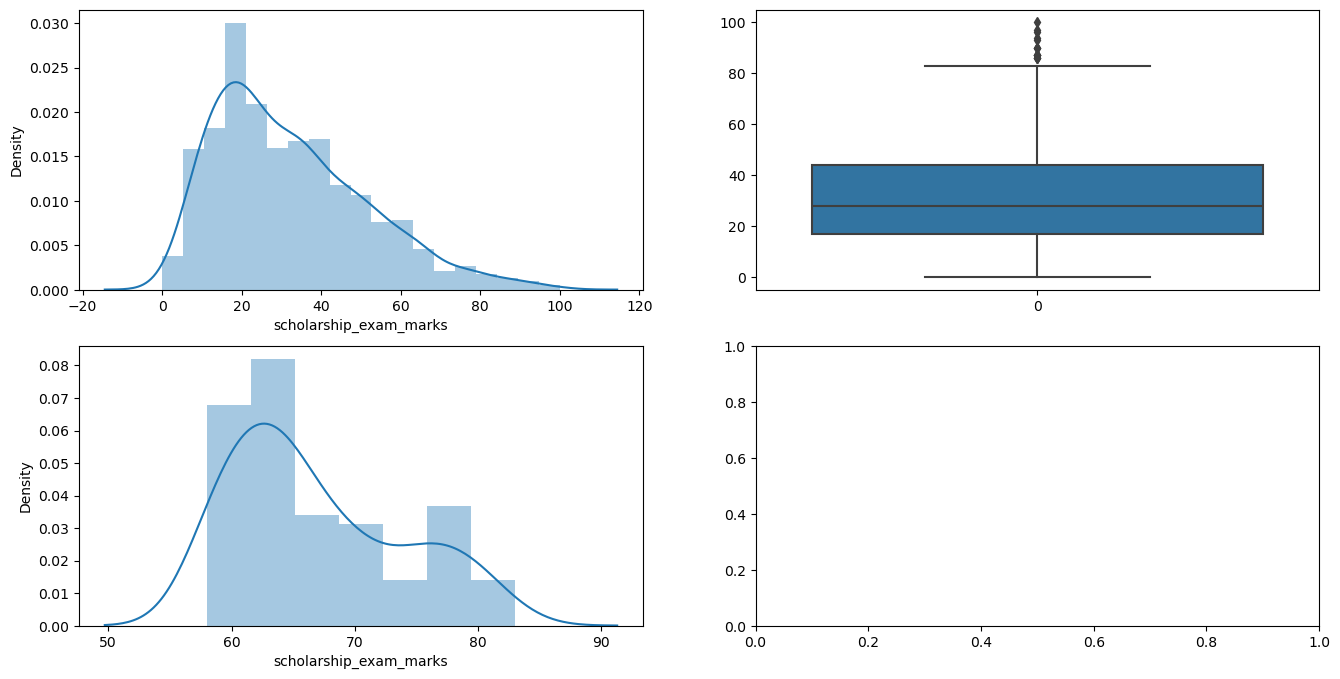

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data["scholarship_exam_marks"])

plt.subplot(2,2,2)
sns.boxplot(data["scholarship_exam_marks"])


plt.subplot(2,2,3)
sns.distplot(new_data["scholarship_exam_marks"])



plt.subplot(2,2,4)
sns.boxplot(new_data["scholarship_exam_marks"])

plt.show()

Capping

In [30]:
new_data2 = data.copy()
new_data2["scholarship_exam_marks"] = np.where(data["scholarship_exam_marks"]>max,
         max, 
         np.where(data["scholarship_exam_marks"]<min,min, data["scholarship_exam_marks"]))

In [33]:
new_data2.shape

(1000, 3)